**Import all the Libraries**

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [186]:
data = pd.read_csv(
    'Online_Retail.csv',
    encoding='ISO-8859-1',
    engine='python',
    on_bad_lines='skip'
)

In [187]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [188]:
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')
data['CustomerID'] = pd.to_numeric(data['CustomerID'], errors='coerce')

**INFORMATION OF COLUMNS IN THE DATA**

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930956 entries, 0 to 930955
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    930956 non-null  object 
 1   StockCode    930956 non-null  object 
 2   Description  928672 non-null  object 
 3   Quantity     930946 non-null  float64
 4   InvoiceDate  930947 non-null  object 
 5   UnitPrice    930932 non-null  float64
 6   CustomerID   707743 non-null  float64
 7   Country      930928 non-null  object 
dtypes: float64(3), object(5)
memory usage: 56.8+ MB


Description of Numeric Features

In [190]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,930946.0,9.656883,208.063385,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,930932.0,4.587183,100.775886,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,707743.0,15287.934588,1710.566091,12346.00,13969.00,15150.00,16782.00,18287.0


Description of Non-Numeric data

In [191]:
data.describe(exclude=['float64','int64']).T

,count,unique,top,freq
InvoiceNo,930956,25905,573585,2228
StockCode,930956,4078,85123A,3799
Description,928672,4240,WHITE HANGING HEART T-LIGHT HOLDER,3901
InvoiceDate,930947,23280,2011-10-31 14:41:00,2228
Country,930928,38,United Kingdom,850132


Check for Null Values

In [192]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,2284
Quantity,10
InvoiceDate,9
UnitPrice,24
CustomerID,223213
Country,28


In [193]:
data.shape

(930956, 8)

Delete all the missing Records

In [194]:
data.dropna(inplace=True)

In [195]:
data.shape

(707742, 8)

In [196]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Checking whether negative value is available for column Quantity and Unit PriceID

In [197]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
929496,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
930588,C581499,M,Manual,-1.0,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
930762,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
930763,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [198]:
data[data['UnitPrice']<0].shape[0]

0

In [199]:
data.shape

(707742, 8)

Drop from Quantity column which have the values less than 0

In [200]:
data.drop(data[data['Quantity']<0].index,inplace=True)

In [201]:
data.shape

(692575, 8)

Calculation of Total amount or monetary value

In [202]:
data['Sales']  =data['Quantity']*data['UnitPrice']
new_data=data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,6796.57
2,12348.0,2107.24
3,12349.0,3515.10
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,161.64
4336,18282.0,356.10
4337,18283.0,3871.86


Calculating the number of Transcations for each Customer

In [203]:
num_trans=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,280
2,12348.0,34
3,12349.0,146
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,14
4336,18282.0,24
4337,18283.0,1380


Calculate the Last Transcation customer has made

In [204]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'], errors='coerce')

In [205]:
data['Last Transaction']= (data['InvoiceDate'].max()-data['InvoiceDate']).dt.days

In [206]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373.0
7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373.0
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373.0


In [207]:
lt=data.groupby(['CustomerID','Country'])['Last Transaction'].max().reset_index()
lt

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325.0
1,12347.0,Iceland,366.0
2,12348.0,Finland,357.0
3,12349.0,Italy,18.0
4,12350.0,Norway,309.0
...,...,...,...
4342,18280.0,United Kingdom,277.0
4343,18281.0,United Kingdom,180.0
4344,18282.0,United Kingdom,125.0
4345,18283.0,United Kingdom,336.0


merge dataframe and columns

In [208]:
merge_table=pd.merge(lt,num_trans,how='inner',on='CustomerID')
merge_table

,CustomerID,Country,Last Transaction,InvoiceNo
0,12346.0,United Kingdom,325.0,1
1,12347.0,Iceland,366.0,280
2,12348.0,Finland,357.0,34
3,12349.0,Italy,18.0,146
4,12350.0,Norway,309.0,17
...,...,...,...,...
4342,18280.0,United Kingdom,277.0,10
4343,18281.0,United Kingdom,180.0,14
4344,18282.0,United Kingdom,125.0,24
4345,18283.0,United Kingdom,336.0,1380


In [209]:
new_df=pd.merge(merge_table,new_data,how='inner',on='CustomerID')
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325.0,1,77183.60
1,12347.0,Iceland,366.0,280,6796.57
2,12348.0,Finland,357.0,34,2107.24
3,12349.0,Italy,18.0,146,3515.10
4,12350.0,Norway,309.0,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277.0,10,180.60
4343,18281.0,United Kingdom,180.0,14,161.64
4344,18282.0,United Kingdom,125.0,24,356.10
4345,18283.0,United Kingdom,336.0,1380,3871.86


Removal of Outliers using boxplot

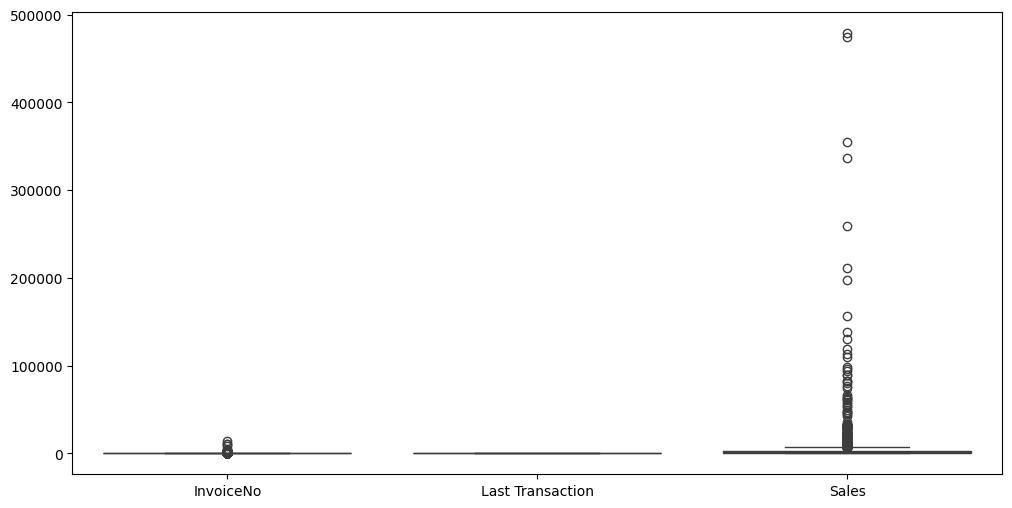

In [213]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df[['InvoiceNo','Last Transaction','Sales']])
plt.show()

In [220]:

IQR=new_df['Sales'].quantile(0.75) - new_df['Sales'].quantile(0.25)
lowerlimit=new_df['Sales'].quantile(0.25) - (IQR*1.5)
upperlimit=new_df['Sales'].quantile(0.75) + (IQR*1.5)
new_df_iqr=new_df[(new_df['Sales']<upperlimit) & (new_df['Sales']>lowerlimit)]
new_df_iqr.shape

(3944, 5)

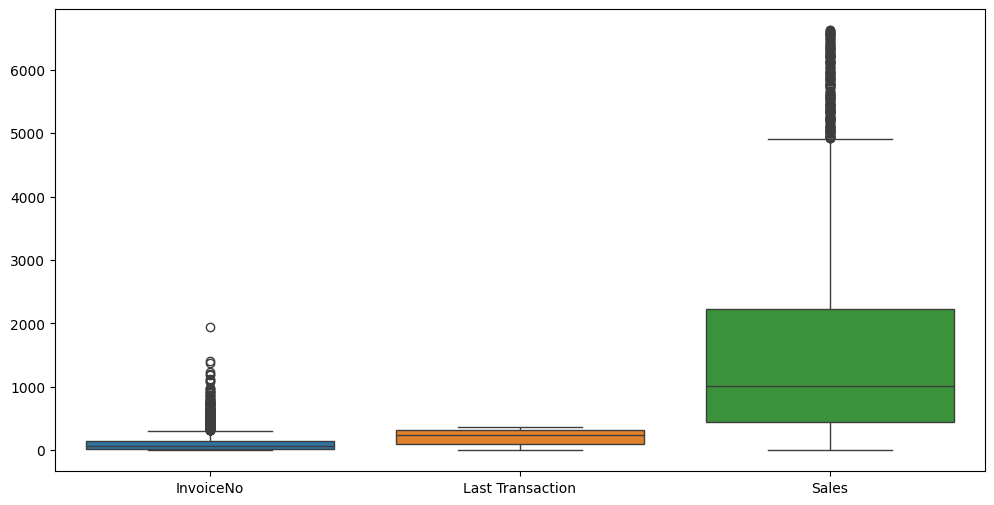

In [221]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df_iqr[['InvoiceNo','Last Transaction','Sales']])
plt.show()

In [222]:
new_df_iqr.reset_index(drop=True,inplace=True)
new_df_iqr

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12348.0,Finland,357.0,34,2107.24
1,12349.0,Italy,18.0,146,3515.10
2,12350.0,Norway,309.0,17,334.40
3,12352.0,Norway,296.0,132,3450.27
4,12353.0,Bahrain,203.0,8,178.00
...,...,...,...,...,...
3939,18280.0,United Kingdom,277.0,10,180.60
3940,18281.0,United Kingdom,180.0,14,161.64
3941,18282.0,United Kingdom,125.0,24,356.10
3942,18283.0,United Kingdom,336.0,1380,3871.86


Visualization of Correlation heatmap


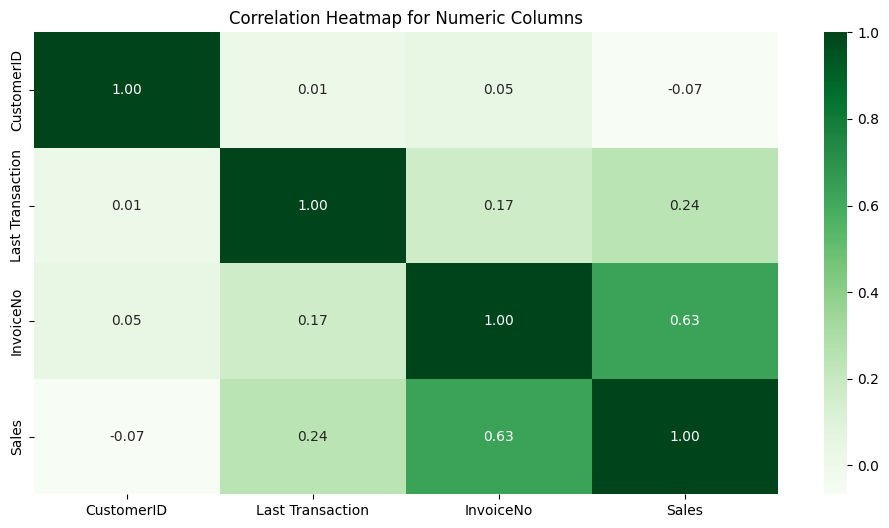

In [224]:
numeric_cols = new_df_iqr.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(12,6))
sns.heatmap(new_df_iqr[numeric_cols].corr(), cmap='Greens', annot=True, fmt=".2f")
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

Normalization of the given dataset


In [225]:
new2_df=new_df_iqr[['InvoiceNo','Last Transaction','Sales']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(new2_df)
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=['InvoiceNo','Last Transaction','Sales']
scaled_df['Country']=new_df_iqr['Country']
scaled_df

,InvoiceNo,Last Transaction,Sales,Country
0,0.017019,0.957105,0.318311,Finland
1,0.074781,0.048257,0.530977,Italy
2,0.008252,0.828418,0.050513,Norway
3,0.067561,0.793566,0.521184,Norway
4,0.003610,0.544236,0.026888,Bahrain
...,...,...,...,...
3939,0.004642,0.742627,0.027281,United Kingdom
3940,0.006704,0.482574,0.024417,United Kingdom
3941,0.011862,0.335121,0.053791,United Kingdom
3942,0.711191,0.900804,0.584868,United Kingdom


K-Means Clustering --Plot the Graph usin gthe Elbow method

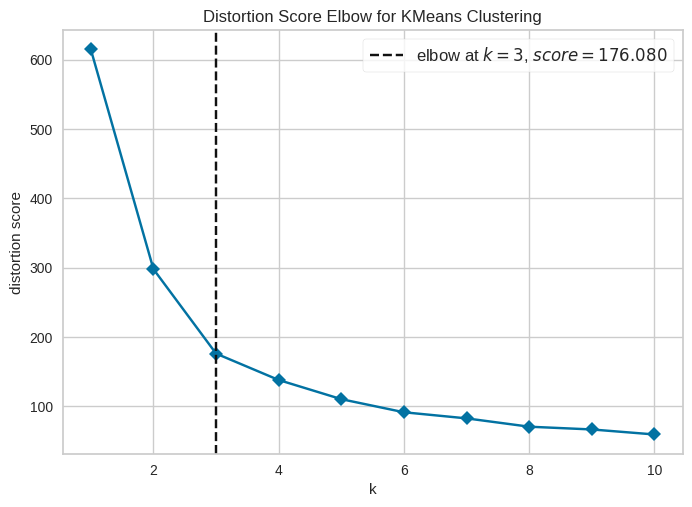

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [226]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
#Elbow method for Kmeans clustering
#Import Elbow Visualizer
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer  = KElbowVisualizer(model,k=(1,11),timings=False)
visualizer.fit(df_k)
visualizer.show()

In [227]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_k)
df_k['Clusters'] = y_predicted
df_k

,InvoiceNo,Last Transaction,Sales,Clusters
0,0.017019,0.957105,0.318311,0
1,0.074781,0.048257,0.530977,1
2,0.008252,0.828418,0.050513,0
3,0.067561,0.793566,0.521184,2
4,0.003610,0.544236,0.026888,0
...,...,...,...,...
3939,0.004642,0.742627,0.027281,0
3940,0.006704,0.482574,0.024417,1
3941,0.011862,0.335121,0.053791,1
3942,0.711191,0.900804,0.584868,2


In [228]:
km.cluster_centers_

array([[0.03495104, 0.7846527 , 0.14275552],
       [0.03968587, 0.2195092 , 0.15979453],
       [0.14033564, 0.78475572, 0.63346713]])

In [232]:
km.labels_

array([0, 1, 0, ..., 1, 2, 2], dtype=int32)

Model Evaluation

In [231]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_k, km.labels_, metric='euclidean')
print(score)

0.7813510346162104
